# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection in audio.

We load the following packages.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola. 

The value $t$ is the time (in seconds) and $y$ is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [22]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


#### Coding Exercise:

- Standardize $y$ and $t$.

- Plot the $y$ vs. $t$.  

In [144]:
# standarize y and t
y = ...
t = ...

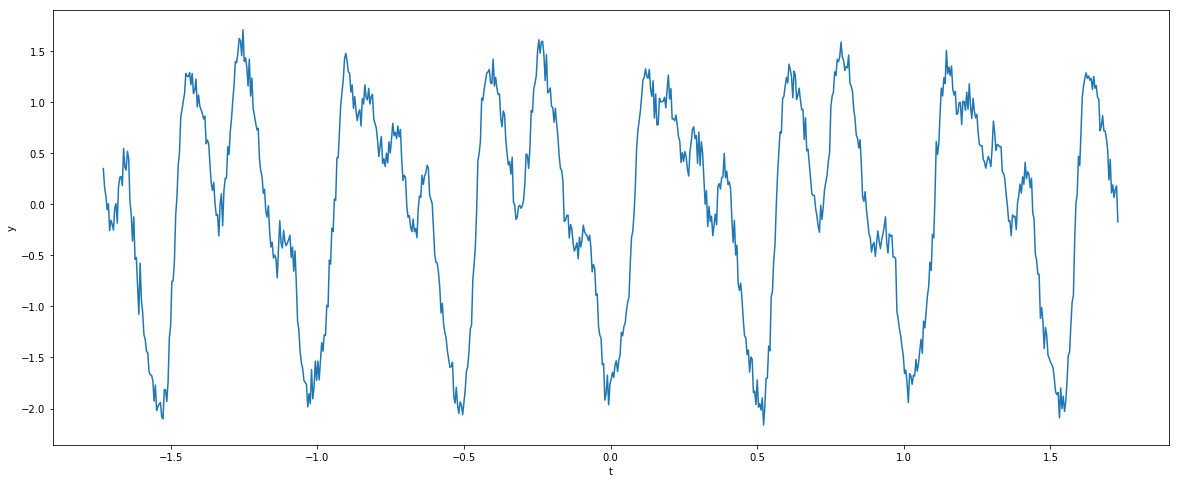

In [145]:
# plot y against t
...

## Sinusoidal Model

We will try to fit a model of the form:

$$y[i] = \sum_j a[j]*\sin(2*\pi*freq[j]*t[i]) + b[j]*\cos(2*\pi*freq[j]*t[i])$$

That is, `y[i]` is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients `a[j]` and `b[j]` are mostly sparse.  


As an example, a simple sinusoid 

$$f(t) = 0.5 \sin(2\pi t \cdot 10) + 0.5 \cos(2\pi t \cdot 10)$$

looks like following:

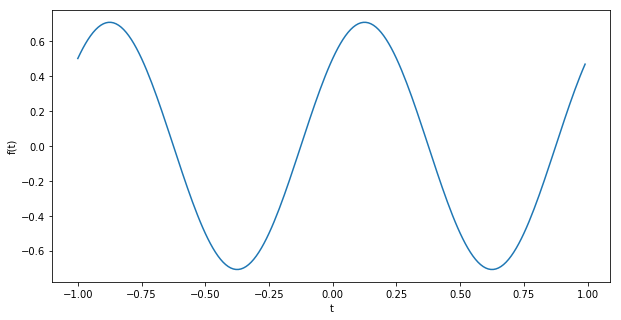

In [143]:
example_t = np.arange(-1, 1, 0.01)
example_f = 10
example_sinusoid = 0.5 * np.sin(2 * np.pi * example_t) + 0.5 * np.cos(2 * np.pi * example_t)
plt.figure(figsize=(10,5))
plt.plot(example_t, example_sinusoid)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

## Problem Formulation

Given a sound wave, $S = \{(y_i, t_i)| i \in \{1,...,n\}\}$, and a set of frequencies $F = \{f_1, f_2, ..., f_d | f_i \in \mathbb{R}\}$, we would like to find an optimal set of parameters $a^* \in \mathbb{R}^d$, $b^* \in \mathbb{R}^d$ that minimizes following loss functions:
$$l(f(t),y) = \frac{1}{n}\sum_{i=1}^n (f(t_i) - y_i)^2$$
where 
$$f(t) = \sum_{j=1}^d a_j \sin(2\pi t f_j) + b_j \cos(2 \pi t f_j)$$

We will use the following vector of frequencies $F$.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [93]:
freq = 55*2**(np.arange(5*96)/96)

To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

#### Coding Exercise:

Complete the function that transforms a series of time points $t$ into a vector of sinusoids. For example, for input $t = [t_1,t_2] $, $\text{freq}=[f_1,f_2]$, we would like the output $X \in \mathbb{R}^{2 \times 4}$, such that:

$$X[0,0] = \sin(2\pi\cdot t_1 \cdot f_1)$$
$$X[1,0] = \sin(2\pi\cdot t_2 \cdot f_1)$$
$$X[0,1] = \sin(2\pi\cdot t_1 \cdot f_2)$$
$$X[1,1] = \sin(2\pi\cdot t_2 \cdot f_2)$$
$$X[0,2] = \cos(2\pi\cdot t_1 \cdot f_1)$$
$$X[1,2] = \cos(2\pi\cdot t_2 \cdot f_1)$$
$$X[0,3] = \cos(2\pi\cdot t_1 \cdot f_2)$$
$$X[1,3] = \cos(2\pi\cdot t_2 \cdot f_2)$$

In [146]:
def transform(t,freq):
    # Let's try to write this using matrix form
    # Step 1: compute the matrix product of t \matmal freq.T
    # see np.matmul for more info
    t_freq_mat = ...
    # Step 2: we then calculate the sin and cos values
    Xcos = ...
    Xsin = ...
    # Step 3: lastly we combine the Xsin and Xcos
    X = np.hstack((Xcos,Xsin))    
    return X

In [128]:
X = transform(t,freq)

In [129]:
X.shape

(800, 960)

#### Coding Exercise:

Split the data $t$ and $y$ into training and test.  Use 50% for each set. Do not shuffle the dataset.

Check the documentation for sklearn.model_selection.train_test_split:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [147]:
from sklearn.model_selection import train_test_split
t_train, t_test, y_train, y_test = ...

In [148]:
X_train = transform(t_train, freq)
X_test = transform(t_test, freq)

## Use LASSO to Find the Frequencies

#### Coding Exercise:
* Use LASSO regression with `alpha=0.01` to fit the model.  
* Find the mean squared error on the test data.
* Plot the predicted value of `y` for the test data

In [132]:
from sklearn.linear_model import Lasso

# TODO
regr = ...
regr.fit(X_train, y_train)
pred_train = ...
pred_test = ...
test_mse = ...

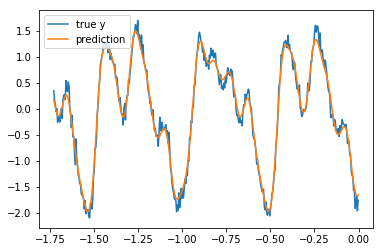

In [133]:
plt.plot(t_train, y_train, label="true y")
plt.plot(t_train, pred_train, label="prediction")
plt.legend()
plt.show()

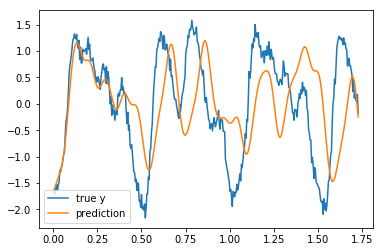

In [134]:
plt.plot(t_test, y_test, label="true y")
plt.plot(t_test, pred_test, label="prediction")
plt.legend()
plt.show()

#### Coding Exercise:

* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.


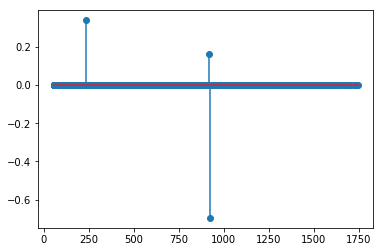

In [108]:
# TODO
w = regr.coef_
a = ...
b = ...
plt.stem(...)
plt.show()

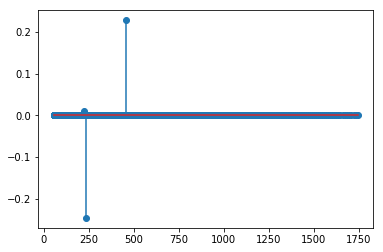

In [109]:
plt.stem(...)
plt.show()

Still have time...
* Find the optimal `alpha` using cross-validation